In [10]:
# Libraries

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.model_selection import train_test_split

In [2]:
#load the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
from keras import layers
from keras import models
from keras.utils import to_categorical

train_labels = train["label"]
train_images = train.drop(labels = ["label"], axis = 1)
test_images = test

# reshape images for dense layers

train_images = train_images.values.reshape((train.shape[0], 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.values.reshape((test.shape[0], 28*28))
test_images = test_images.astype('float32') / 255


# train test split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state=2)


# one hot encode labels
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

# Create a basic neural network with dense layers
model = models.Sequential()
model.add(layers.Dense(32, activation = "relu", input_shape = (28*28,)))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = "RMSprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [17]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=200, validation_data=(val_images, val_labels))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 1s 19us/step - loss: 0.0781 - acc: 0.9778 - val_loss: 0.1346 - val_acc: 0.9590
Epoch 2/20
37800/37800 [==============================] - 1s 20us/step - loss: 0.0759 - acc: 0.9783 - val_loss: 0.1312 - val_acc: 0.9612
Epoch 3/20
37800/37800 [==============================] - 1s 19us/step - loss: 0.0728 - acc: 0.9797 - val_loss: 0.1376 - val_acc: 0.9624
Epoch 4/20
37800/37800 [==============================] - 1s 19us/step - loss: 0.0705 - acc: 0.9804 - val_loss: 0.1312 - val_acc: 0.9602
Epoch 5/20
37800/37800 [==============================] - 1s 19us/step - loss: 0.0685 - acc: 0.9805 - val_loss: 0.1304 - val_acc: 0.9574
Epoch 6/20
37800/37800 [==============================] - 1s 20us/step - loss: 0.0659 - acc: 0.9814 - val_loss: 0.1312 - val_acc: 0.9607
Epoch 7/20
37800/37800 [==============================] - 1s 20us/step - loss: 0.0639 - acc: 0.9822 - val_loss: 0.1315 - val_acc:

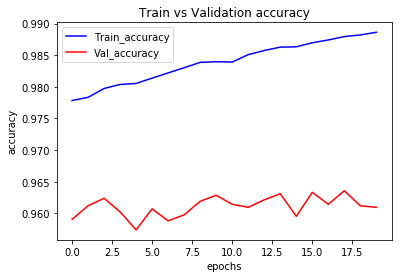

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Train vs Validation accuracy")
plt.legend()
plt.show()

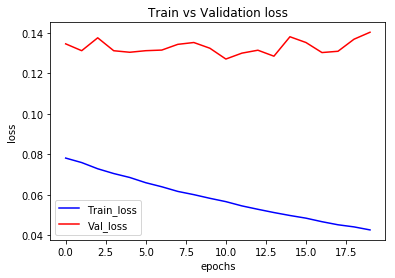

In [19]:
plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Train vs Validation loss")
plt.legend()
plt.show()

In [22]:
import keras
model = keras.Sequential()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
val_images = val_images.reshape((val_images.shape[0], 28, 28, 1))

from keras import layers, losses, metrics, optimizers

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
# try with dropout
model.add(layers.Flatten())
model.add(layers.Dense(10, activation = "softmax"))

# try with other optimizer
model.compile(optimizer = "RMSprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# other epochs and batchsize
history = model.fit(train_images, train_labels, epochs=20, batch_size=200, validation_data=(val_images, val_labels))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 30s 791us/step - loss: 0.4089 - acc: 0.8819 - val_loss: 0.1489 - val_acc: 0.9548
Epoch 2/20
37800/37800 [==============================] - 29s 776us/step - loss: 0.1172 - acc: 0.9637 - val_loss: 0.0937 - val_acc: 0.9707
Epoch 3/20
37800/37800 [==============================] - 30s 780us/step - loss: 0.0780 - acc: 0.9761 - val_loss: 0.0790 - val_acc: 0.9733
Epoch 4/20
37800/37800 [==============================] - 30s 799us/step - loss: 0.0620 - acc: 0.9810 - val_loss: 0.0581 - val_acc: 0.9821
Epoch 5/20
37800/37800 [==============================] - 30s 806us/step - loss: 0.0511 - acc: 0.9841 - val_loss: 0.0555 - val_acc: 0.9814
Epoch 6/20
37800/37800 [==============================] - 31s 832us/step - loss: 0.0439 - acc: 0.9863 - val_loss: 0.0534 - val_acc: 0.9826
Epoch 7/20
37800/37800 [==============================] - 32s 834us/step - loss: 0.0377 - acc: 0.9889 - val_loss: 0.0

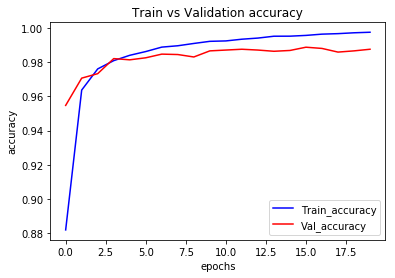

In [23]:
plt.plot(history.history["acc"], "b", label = "Train_accuracy")
plt.plot(history.history["val_acc"], "r", label = "Val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Train vs Validation accuracy")
plt.legend()
plt.show()

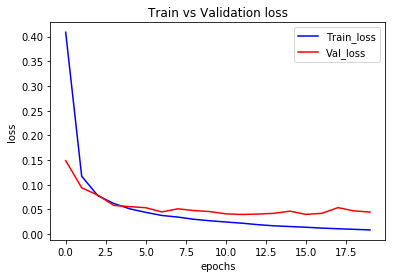

In [24]:
plt.plot(history.history["loss"], "b", label = "Train_loss")
plt.plot(history.history["val_loss"], "r", label = "Val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Train vs Validation loss")
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [31]:
train_labels.shape

(37800, 10)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       0.99      0.99      0.99       485
           2       0.99      0.99      0.99       403
           3       0.98      0.99      0.98       418
           4       0.99      0.99      0.99       461
           5       0.99      0.98      0.99       372
           6       0.99      0.98      0.98       413
           7       1.00      0.98      0.99       446
           8       0.97      1.00      0.98       382
           9       0.99      0.98      0.98       409

   micro avg       0.99      0.99      0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200

Accuracy score : 0.9876190476190476


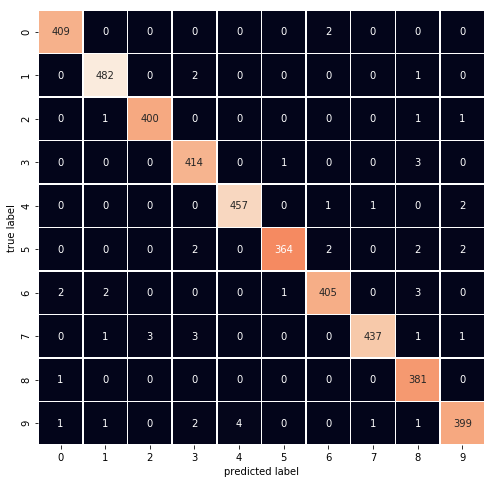

In [35]:
import numpy as np
from numpy import argmax

pred_val_cnn = model.predict_classes(val_images)
plot_confusion_matrix(argmax(val_labels,-1), pred_val_cnn)
print(classification_report(argmax(val_labels,-1), pred_val_cnn))
acc_cnn = accuracy_score(argmax(val_labels,-1), pred_val_cnn)
print("Accuracy score : {}".format(acc_cnn))